In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.cluster
import sklearn.datasets
import sklearn.impute
import geopandas
import pandas
import shapely
import matplotlib.pyplot as plt

(20.0, 50.0)

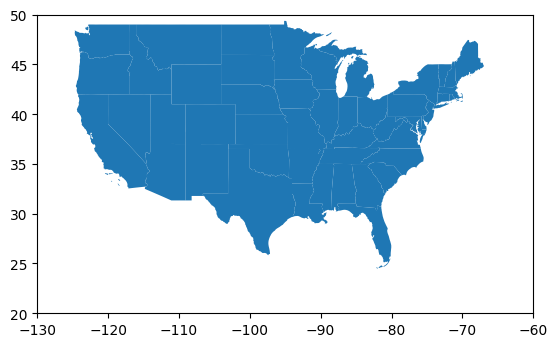

In [2]:
# Read the US Map
map = geopandas.read_file("cb_2018_us_state_20m.zip")
ax = map.plot()
ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

In [3]:
# Read the economic data
data = pandas.read_csv("SASUMMARY__ALL_AREAS_1998_2022.csv")
name = data[data["LineCode"] == 1.0]["GeoName"].reset_index(drop = True)
dpi = data[data["LineCode"] == 11.0]["2021"].reset_index(drop = True)
pce = data[data["LineCode"] == 12.0]["2021"].reset_index(drop = True)
rpp = data[data["LineCode"] == 13.0]["2021"].reset_index(drop = True)
sub = pandas.concat([name, dpi, pce, rpp], axis = 1)
sub.columns = ["NAME", "DPI", "PCE", "RPP"]
sub

,NAME,DPI,PCE,RPP
0,United States,56175,48318,100.000
1,Alabama,45191,39174,88.139
2,Alaska,60126,53982,104.439
3,Arizona,50149,46023,96.721
4,Arkansas,46644,39231,89.445
5,California,64385,54838,111.797
6,Colorado,62487,54126,103.009
7,Connecticut,67013,56371,102.603
8,Delaware,51079,50700,97.677
9,District of Columbia,80275,79105,111.271


In [4]:
# Merge the two data sets
combined = map.merge(sub, how = "left", on = "NAME")[["NAME", "geometry", "DPI", "PCE", "RPP"]]
combined.head(5)

,NAME,geometry,DPI,PCE,RPP
0,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",58805,48549,106.223
1,Iowa,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",51922,42247,89.568
2,Delaware,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",51079,50700,97.677
3,Ohio,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",50733,44215,92.459
4,Pennsylvania,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",56289,48874,96.371


In [5]:
# Extract the feature columns and standardize
features = combined[["DPI", "PCE", "RPP"]]
impute = sklearn.impute.SimpleImputer(strategy = "mean")
impute.fit(features)
full = impute.transform(features)
scale = sklearn.preprocessing.StandardScaler()
scale.fit(full)
x = scale.transform(full)
x[0:5, :]

array([[ 0.53930445,  0.13934152,  1.30270512],
       [-0.42558713, -0.79117111, -1.09569665],
       [-0.54376287,  0.45694429,  0.07203916],
       [-0.59226679, -0.50058894, -0.67937846],
       [ 0.18659964,  0.18732892, -0.11603125]])

(20.0, 50.0)

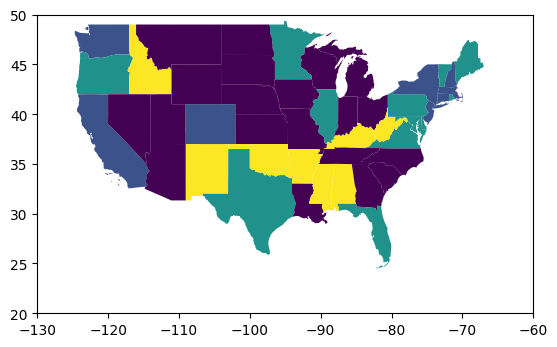

In [6]:
# Show clusters on map
cluster = sklearn.cluster.AgglomerativeClustering(n_clusters = 5)
cluster.fit(x)
ax = map.plot(cluster.labels_)
ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

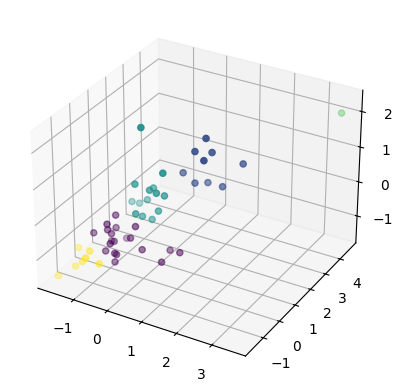

In [7]:
# Show clusters in feature space
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = cluster.labels_)